# Zoidberg 2.0

Given a dataset of x-rays, we are to find the right model to help doctors in detecting pneumonia.
First, we'll load the training images into a `pd.DataFrame` for ease of manipulation and visualization.

We know that in each of the `train`, `test` and `val` folders, the images are split into two folders `NORMAL` representing a normal lung and `PNEUMONIA` representing an infected lung. Therefore, during extraction we will label images of a healthy lung (`NORMAL`) with a `0` and `1` for the ones with pneumonia.

In [3]:
import os
from PIL import Image
import pandas as pd

# Extracting images from the folder
def extract_images(folder_path):
  # Extracting normal images 
  normal_images_folder = os.path.join(folder_path, 'NORMAL')
  pneumonia_images_folder = os.path.join(folder_path, 'PNEUMONIA')
  data = {
    "images": [],
    "label": []
  }
  
  for folder_path in [normal_images_folder, pneumonia_images_folder]:
    if os.path.exists(folder_path):
      for image_path in os.listdir(folder_path):
        if not image_path.endswith('.jpeg'):
          continue
        image = Image.open(os.path.join(folder_path, image_path))
        data["images"].append(image)
        data["label"].append(0 if folder_path == normal_images_folder else 1)
        
  return pd.DataFrame(data)

In [6]:
train_data = extract_images('./datasets/chest_Xray/train')
test_data = extract_images('./datasets/chest_Xray/test')

Now that we have our data, we can start by checking the number of image per `class`. 

Train data : label
1    3875
0    1341
Name: count, dtype: int64


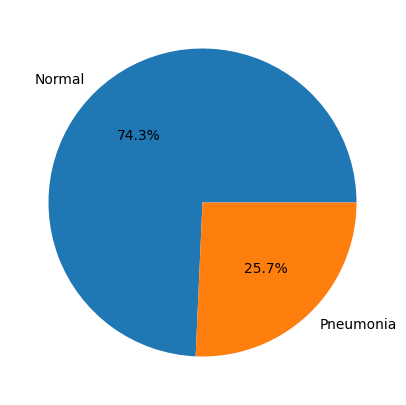

In [19]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(train_data['label'].value_counts(), labels=['Normal', 'Pneumonia'], autopct='%1.1f%%')

print("Train data :", train_data['label'].value_counts())

We can clearly see an imbalance between the two classes and that's something to keep in mind as it might lead any model towards over-fitting in favor of `infected` (for instances with label `1`).  

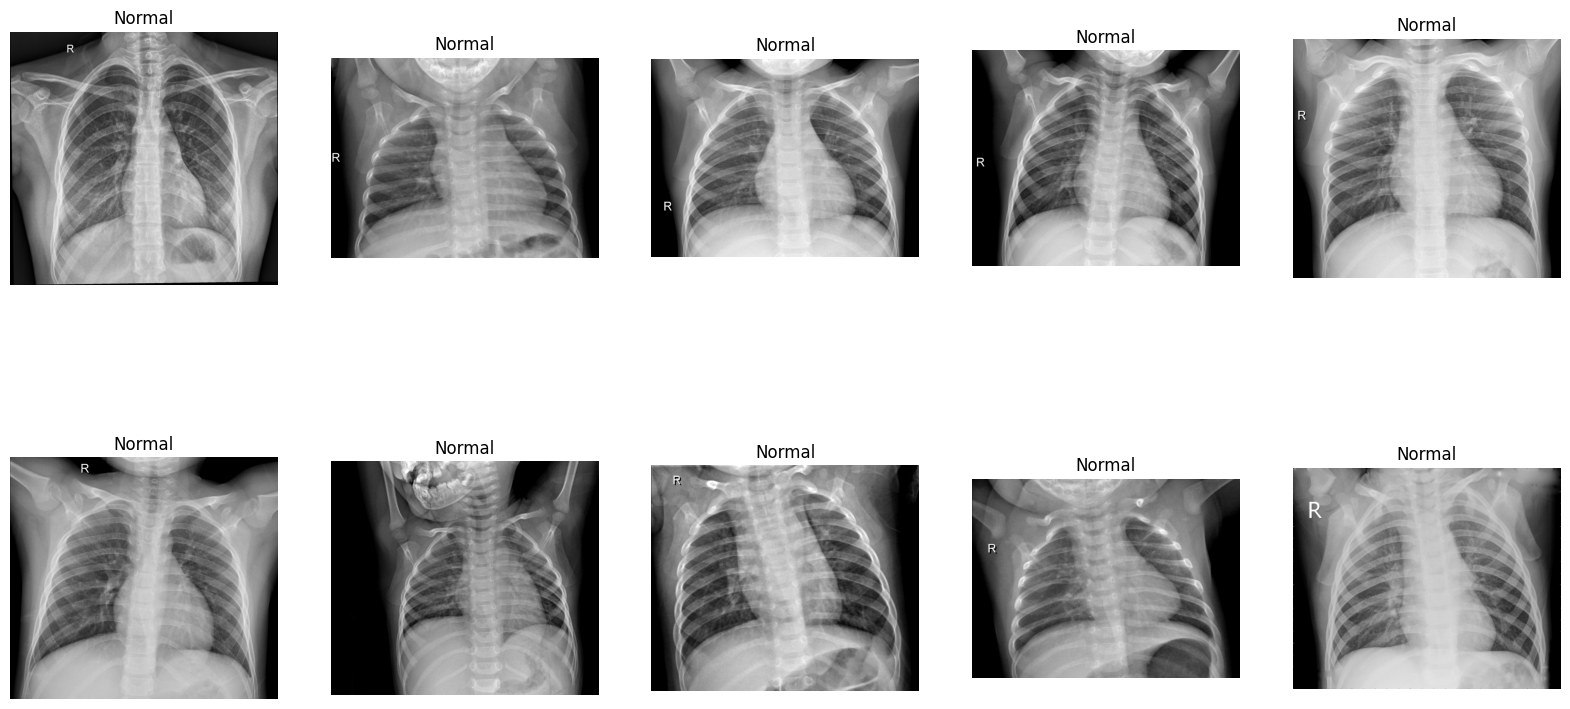

In [12]:
from matplotlib import pyplot as plt

# Displaying the images
def display_images(data):
  fig, axes = plt.subplots(2, 5, figsize=(20, 10))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data['images'][i], cmap='gray')
    ax.set_title('Normal' if data['label'][i] == 0 else 'Pneumonia')
    ax.axis('off')
  plt.show()
  
display_images(train_data)


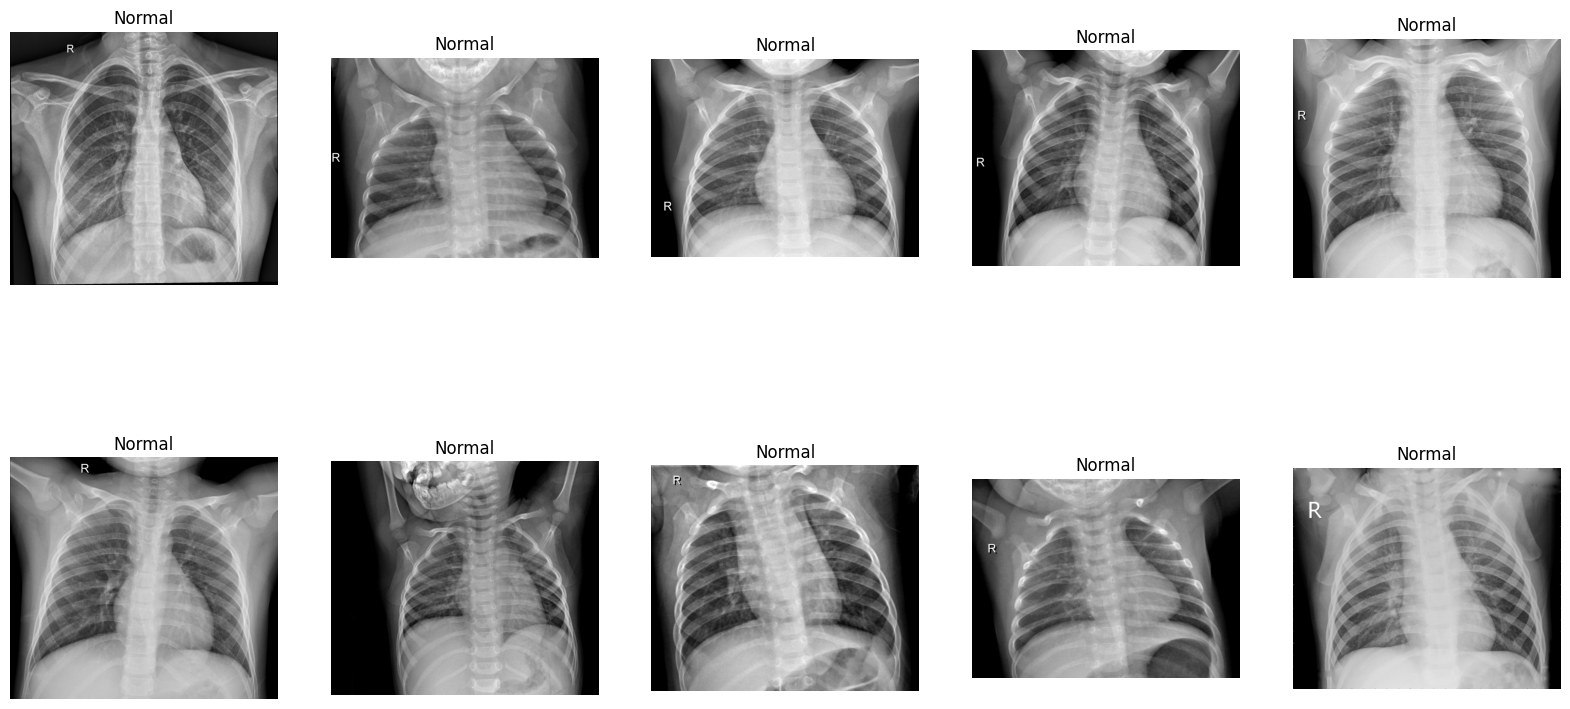